Found labels: ['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse'

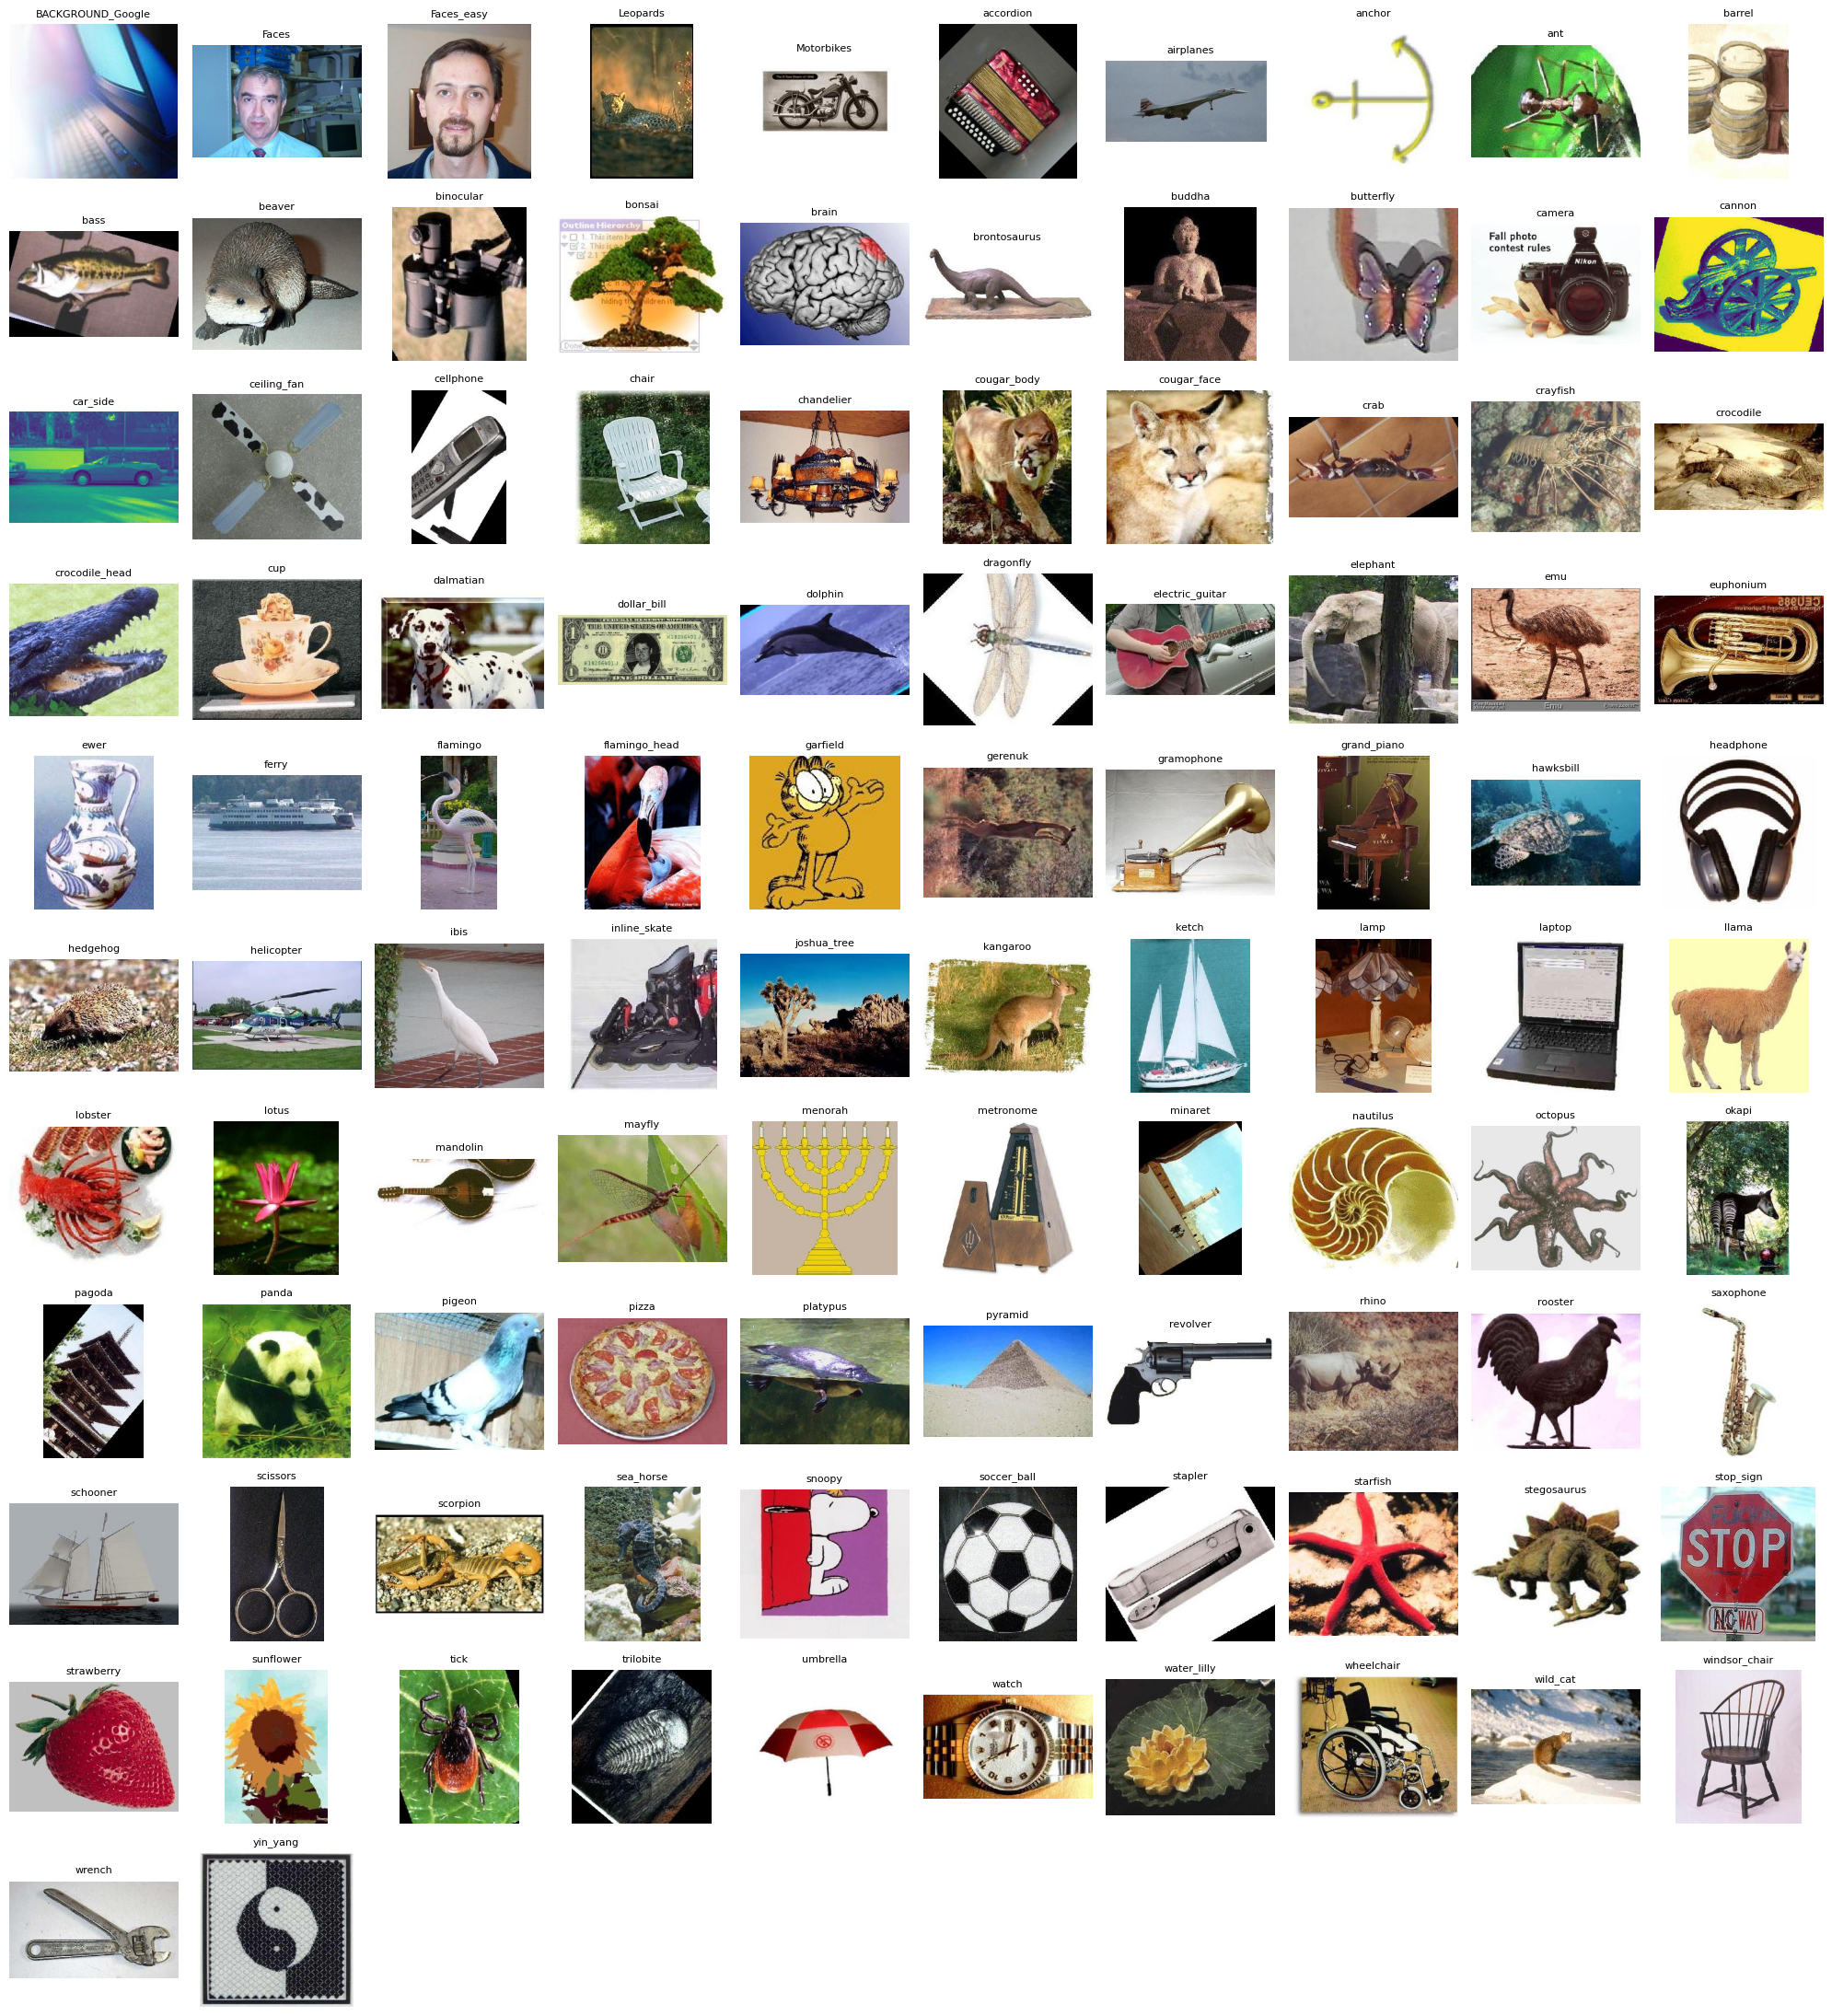

In [1]:
import os
import random
import math
import numpy as np
import pandas as pd
import textwrap
import matplotlib.pyplot as plt
from PIL import Image


import matplotlib.pyplot as plt


# Set the directory containing the dataset
data_dir = './data/caltech101/101_ObjectCategories'

# Get a sorted list of all label directories
labels = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
print("Found labels:", labels)

# Set up a grid layout;
n_labels = len(labels)
n_cols = 10  # 10 images per row
n_rows = math.ceil(n_labels / n_cols)

plt.figure(figsize=(n_cols * 2, n_rows * 2))
for i, label in enumerate(labels):
    label_path = os.path.join(data_dir, label)
    # Find image files (adjust extensions if needed)
    image_files = [f for f in os.listdir(label_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
    if not image_files:
        print(f"No images found for label: {label}")
        continue
    # Select one random image from the label folder
    sample_image = random.choice(image_files)
    image_path = os.path.join(label_path, sample_image)
    
    # Open and display the image
    img = Image.open(image_path)
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(img)
    plt.title(label, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


Image counts per label:
BACKGROUND_Google: 467
Faces: 435
Faces_easy: 435
Leopards: 200
Motorbikes: 798
accordion: 55
airplanes: 800
anchor: 42
ant: 42
barrel: 47
bass: 54
beaver: 46
binocular: 33
bonsai: 128
brain: 98
brontosaurus: 43
buddha: 85
butterfly: 91
camera: 50
cannon: 43
car_side: 123
ceiling_fan: 47
cellphone: 59
chair: 62
chandelier: 107
cougar_body: 47
cougar_face: 69
crab: 73
crayfish: 70
crocodile: 50
crocodile_head: 51
cup: 57
dalmatian: 67
dollar_bill: 52
dolphin: 65
dragonfly: 68
electric_guitar: 75
elephant: 64
emu: 53
euphonium: 64
ewer: 85
ferry: 67
flamingo: 67
flamingo_head: 45
garfield: 34
gerenuk: 34
gramophone: 51
grand_piano: 99
hawksbill: 100
headphone: 42
hedgehog: 54
helicopter: 88
ibis: 80
inline_skate: 31
joshua_tree: 64
kangaroo: 86
ketch: 114
lamp: 61
laptop: 81
llama: 78
lobster: 41
lotus: 66
mandolin: 43
mayfly: 40
menorah: 87
metronome: 32
minaret: 76
nautilus: 55
octopus: 35
okapi: 39
pagoda: 47
panda: 38
pigeon: 45
pizza: 53
platypus: 34
pyramid

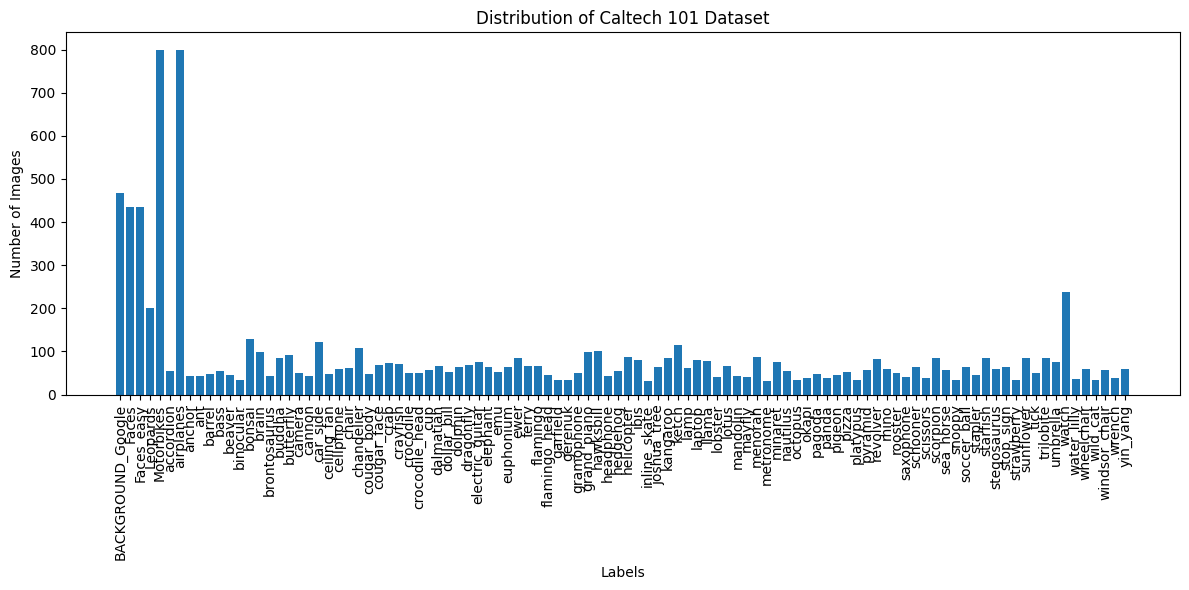

In [2]:
# Count the number of images in each label folder
label_counts = {}
for label in labels:
    label_path = os.path.join(data_dir, label)
    # Adjust the extensions as needed
    image_files = [f for f in os.listdir(label_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
    label_counts[label] = len(image_files)

# Print the counts for each label
print("\nImage counts per label:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

# Plot the distribution of image counts per label
plt.figure(figsize=(12, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Labels")
plt.ylabel("Number of Images")
plt.title("Distribution of Caltech 101 Dataset")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Aside from the changes of the data augmentation (Resize, RandomHorizontalFlip, RandomRotation), dropout in the fully connected layers of convolutional neural network models, and the different optimizer (Adam, SGD with Momentum, RMSprop). These are all the hyperparameter settings shared by all the models.

# Hyperparameters
random_seed: 2025
num_classes: 101
learning_rate: 0.001
batch_size: 256
num_epochs: 100
validation_percent: 0.05
# Use 'cpu' if not available
cuda_device: 0

# Weight Init: xavier_uniform, kaiming_normal, kaiming_uniform 
weight_init:
  name: xavier_uniform

# ReduceLROnPlateau, ExponentialLR, StepLR
scheduler:
  name: ReduceLROnPlateau
  factor: 0.1
  mode: max
  patience: 5



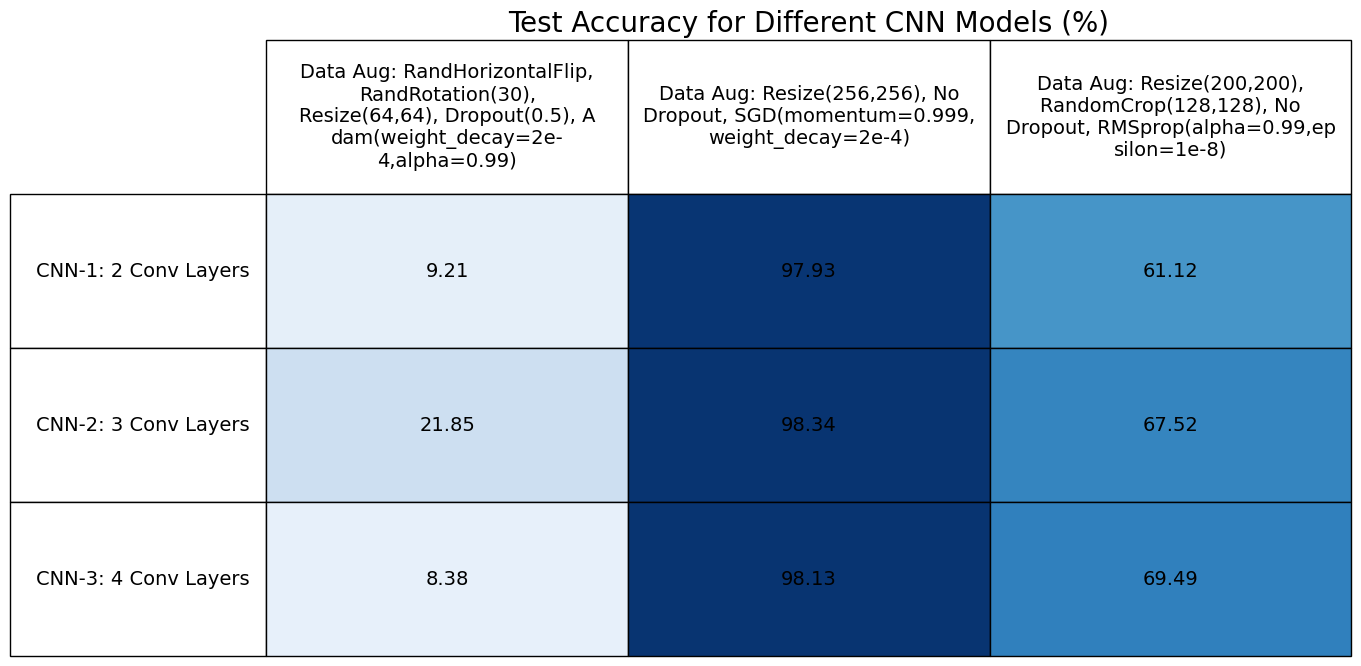

In [3]:
def wrap_text(text, width=30):
    """Wrap text to a specified width."""
    return "\n".join(textwrap.wrap(text, width=width))

# Collected from the results of the experiments
# Each row corresponds to a different CNN model
# Each column corresponds to a different hyperparameter setting
accuracy_array = np.array([
    [9.21, 97.93, 61.12],    # CNN-1 results
    [21.85, 98.34, 67.52],   # CNN-2 results
    [8.38, 98.13, 69.49]       # CNN-3 results
])

# Original row names
row_names = [
    "CNN-1: 2 Conv Layers",
    "CNN-2: 3 Conv Layers",
    "CNN-3: 4 Conv Layers"
]
wrapped_row_names = [wrap_text(name, width=30) for name in row_names]

column_names = [
    "Data Aug: RandHorizontalFlip, RandRotation(30), Resize(64,64), Dropout(0.5), Adam(weight_decay=2e-4,alpha=0.99)",
    "Data Aug: Resize(256,256), No Dropout, SGD(momentum=0.999, weight_decay=2e-4)",
    "Data Aug: Resize(200,200), RandomCrop(128,128), No Dropout, RMSprop(alpha=0.99,epsilon=1e-8)"
]
# Wrap the column names 
wrapped_column_names = [wrap_text(name, width=30) for name in column_names]

# Create a DataFrame with wrapped labels
df = pd.DataFrame(accuracy_array, index=wrapped_row_names, columns=wrapped_column_names)

# Create figure and axis with an enlarged figure size to accommodate wrapped text
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_axis_off()  # Turn off the axis

col_widths = [0.3] * len(wrapped_column_names)

table = ax.table(cellText=df.round(2).values,
                 rowLabels=df.index,
                 colLabels=df.columns,
                 cellLoc='center',
                 colWidths=col_widths,
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 1.2)

# Apply color gradient based on the accuracy values (normalized by 100)
for i in range(len(row_names)):
    for j in range(len(column_names)):
        val = accuracy_array[i, j]
        # Normalize value (assuming maximum ~100%)
        color = plt.cm.Blues(val / 100)
        table[i+1, j].set_facecolor(color)

plt.title("Test Accuracy for Different CNN Models (%)", fontsize=20)
plt.show()